## 기본 베이지 DNN

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from torch.utils.data import TensorDataset, DataLoader
from tensorflow.python.keras import metrics
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import SMOTE
import math
import matplotlib.pyplot as plt
%matplotlib inline

path = "./optimal_data2"
file_list = os.listdir(path)



In [2]:
%matplotlib inline

In [3]:
df=pd.read_excel('./optimal_data2/'+'Continous_2weeks_2day_1term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
X

1          3           4         5        6         7
0       45.0000      72.00     0.00000      0.00     0.00  148.0000
1       45.0000      72.00     0.00000      0.00     0.00  148.0000
2       45.0000      72.00     0.00000      0.00     0.00  148.0000
3       45.0000      72.00     0.00000      0.00     0.00  148.0000
4       45.0000      72.00     0.00000      0.00     0.00  148.0000
5       45.0000      72.00     0.00000      0.00     0.00  148.0000
6       45.0000      72.00     0.00000      0.00     0.00  148.0000
7       45.0000      72.00     0.00000      0.00     0.00  148.0000
8       45.0000      72.00     0.00000      0.00     0.00  148.0000
9       45.0000      72.00     0.00000      0.00     0.00  148.0000
10      45.0000      72.00     0.00000      0.00     0.00  148.0000
11      45.0000      72.00     0.00000      0.00     0.00  148.0000
12      45.0000      72.00     0.00000      0.00     0.00  148.0000
13      45.0000      72.00     0.00000      0.00     0.00  148.0000
14      45.0000      72.00     0.00000      0.00     0.00  148.0000
15      45.0000      72.00     0.00000      0.00     0.00  148.0000
16      45.0000      72.00     0.00000      0.00     0.00  148.0000
17      45.0000      72.00     0.00000      0.00     0.00  148.0000
18      45.0000      72.00     0.00000      0.00     0.00  148.0000
19      45.0000      72.00     0.00000      0.00     0.00  148.0000
20      45.0000      72.00     0.00000      0.00     0.00  148.0000
21      45.0000      72.00     0.00000      0.00     0.00  148.0000
22      45.0000      72.00     0.00000      0.00     0.00  148.0000
23      45.0000      72.00     0.00000      0.00     0.00  148.0000
24      45.0000      72.00     0.00000      0.00     0.00  148.0000
25      45.0000      72.00     0.00000      0.00     0.00  148.0000
26      45.0000      72.00     0.00000      0.00     0.00  148.0000
27      45.0000      72.00     0.00000      0.00     0.00  148.0000
28      45.0000      72.00     0.00000      0.00     0.00  148.0000
29      45.0000      72.00     0.00000      0.00     0.00  148.0000
30      45.0000      72.00     0.00000      0.00     0.00  148.0000
31      45.0000      72.00     0.00000      0.00     0.00  148.0000
32      45.0000      72.00     0.00000      0.00     0.00  148.0000
33      45.0000      72.00     0.00000      0.00     0.00  148.0000
34      45.0000      72.00     0.00000      0.00     0.00  148.0000
35      45.0000      72.00     0.00000      0.00     0.00  148.0000
36      45.0000      72.00     0.00000      0.00     0.00  148.0000
37      45.0000      72.00     0.00000      0.00     0.00  148.0000
38      45.0000      72.00     0.00000      0.00     0.00  148.0000
39      45.0000      72.00     0.00000      0.00     0.00  148.0000
40      45.0000      72.00     0.00000      0.00     0.00  148.0000
41      45.0000      72.00     0.00000      0.00     0.00  148.0000
42      45.0000      72.00     0.00000      0.00     0.00  148.0000
43      45.0000      72.00     0.00000      0.00     0.00  148.0000
44      45.0000      72.00     0.00000      0.00     0.00  148.0000
45      45.0000      72.00     0.00000      0.00     0.00  148.0000
46      45.0000      72.00     0.00000      0.00     0.00  148.0000
47      45.0000      72.00     0.00000      0.00     0.00  148.0000
48      45.0000      72.00     0.00000      0.00     0.00  148.0000
49      45.0000      72.00     0.00000      0.00     0.00  148.0000
50      45.0000      72.00     0.00000      0.00     0.00  148.0000
51      45.0000      72.00     0.00000      0.00     0.00  148.0000
52      45.0000      72.00     0.00000      0.00     0.00  148.0000
53      45.0000      72.00     0.00000      0.00     0.00  148.0000
54      45.0000      72.00     0.00000      0.00     0.00  148.0000
55      45.0000      72.00     0.00000      0.00     0.00  148.0000
56      45.0000      72.00     0.00000      0.00     0.00  148.0000
57      45.0000      72.00     0.00000      0.00     0.00  148.0000
58

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [7]:
smote = SMOTE(random_state=0)
X_over,y_over = smote.fit_resample(X,y)
print('SMOTE 적용 전 피처/레이블 데이터 세트: ', X.shape, y.shape)
print('SMOTE 적용 후 피처/레이블 데이터 세트: ', X_over.shape, y_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())


SMOTE 적용 전 피처/레이블 데이터 세트:  (26726, 6) (26726,)
SMOTE 적용 후 피처/레이블 데이터 세트:  (73770, 6) (73770,)
SMOTE 적용 전 레이블 값 분포: 
 0    24590
1     1355
2      781
Name: 8, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    24590
1    24590
2    24590
Name: 8, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.30)

In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=16,shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16,shuffle=False)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
X

array([[ 0.29177803, -0.45507806, -0.19742175, -0.49481695, -0.94863432,
        -0.0755986 ],
       [ 0.29177803, -0.45507806, -0.19742175, -0.49481695, -0.94863432,
        -0.0755986 ],
       [ 0.29177803, -0.45507806, -0.19742175, -0.49481695, -0.94863432,
        -0.0755986 ],
       ...,
       [ 2.43706596, -0.46776751, -0.19742175, -0.49481695, -0.94863432,
         0.3230133 ],
       [ 2.43706596, -0.46776751, -0.19742175, -0.49481695, -0.94863432,
         0.3230133 ],
       [ 2.43706596, -0.46776751, -0.19742175, -0.49481695, -0.94863432,
         0.3230133 ]])

In [11]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.input_layer = nn.Linear(6, 128)
        self.hidden_layer1 = nn.Linear(128, 256)
        self.hidden_layer2 = nn.Linear(256, 128)
        self.output_layer   = nn.Linear(128,3)
        self.relu = nn.ReLU()



    def forward(self, x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        out =  self.output_layer(out)
        return out 



# device 설정 (cuda:0 혹은 cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = DNNModel() # Model 생성
model.to(device)   # device 에 로드 (cpu or cuda)

# 옵티마이저를 정의합니다. 옵티마이저에는 model.parameters()를 지정해야 합니다.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 손실함수(loss function)을 지정합니다. Multi-Class Classification 이기 때문에 CrossEntropy 손실을 지정하였습니다.
loss_fn = nn.CrossEntropyLoss()

In [12]:
from tqdm import tqdm  # Progress Bar 출력

def model_train(model, data_loader, loss_fn, optimizer, device):
    # 모델을 훈련모드로 설정합니다. training mode 일 때 Gradient 가 업데이트 됩니다. 반드시 train()으로 모드 변경을 해야 합니다.
    model.train()
    # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
    running_loss = 0
    corr = 0

    # 예쁘게 Progress Bar를 출력하면서 훈련 상태를 모니터링 하기 위하여 tqdm으로 래핑합니다.
    prograss_bar = tqdm(data_loader)

    # mini-batch 학습을 시작합니다.
    for data, lbl in prograss_bar:
        # image, label 데이터를 device에 올립니다.
        data, lbl = data.to(device), lbl.to(device)
        # 누적 Gradient를 초기화 합니다.
        optimizer.zero_grad()

        # Forward Propagation을 진행하여 결과를 얻습니다.
        output = model(data)

        # 손실함수에 output, label 값을 대입하여 손실을 계산합니다.
        loss = loss_fn(output, lbl)
        # 오차역전파(Back Propagation)을 진행하여 미분 값을 계산합니다.
        loss.backward()

        # 계산된 Gradient를 업데이트 합니다.
        optimizer.step()

        # output의 max(dim=1)은 max probability와 max index를 반환합니다.
        # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
        _, pred = output.max(dim=1)
        # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
        # 합계는 corr 변수에 누적합니다.
        corr += pred.eq(lbl).sum().item()
        
        # loss 값은 1개 배치의 평균 손실(loss) 입니다. data.size(0)은 배치사이즈(batch size) 입니다.
        # loss 와 data.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
        # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
        running_loss += loss.item() * data.size(0)

    # 누적된 정답수를 전체 개수로 나누어 주면 정확도가 산출됩니다.
    acc = corr / len(data_loader.dataset)
    # 평균 손실(loss)과 정확도를 반환합니다.
    # train_loss, train_acc
    return running_loss / len(data_loader.dataset), acc

In [13]:
def model_evaluate(model, data_loader, loss_fn, device):
    # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다. 
    # dropout과 같은 layer의 역할 변경을 위하여 evaluation 진행시 꼭 필요한 절차 입니다.
    model.eval()
    # Gradient가 업데이트 되는 것을 방지 하기 위하여 반드시 필요합니다.
    with torch.no_grad():
        # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
        corr = 0
        running_loss = 0

        # 배치별 evaluation을 진행합니다.
        for data, lbl in data_loader:
            # device에 데이터를 올립니다.
            data, lbl = data.to(device), lbl.to(device)

            # 모델에 Forward Propagation을 하여 결과를 도출합니다.
            output = model(data)

            # output의 max(dim=1)은 max probability와 max index를 반환합니다.
            # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
            _, pred = output.max(dim=1)
            

            # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
            # 합계는 corr 변수에 누적합니다.
            corr += torch.sum(pred.eq(lbl)).item()
            
            # loss 값은 1개 배치의 평균 손실(loss) 입니다. data.size(0)은 배치사이즈(batch size) 입니다.
            # loss 와 data.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
            # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
            running_loss += loss_fn(output, lbl).item() * data.size(0)

        # validation 정확도를 계산합니다.
        # 누적한 정답숫자를 전체 데이터셋의 숫자로 나누어 최종 accuracy를 산출합니다.
        acc = corr / len(data_loader.dataset)

        # 결과를 반환합니다.
        # val_loss, val_acc
        return running_loss / len(data_loader.dataset), acc

In [14]:
def model_test(model, data_loader, loss_fn, device):
    # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다. 
    # dropout과 같은 layer의 역할 변경을 위하여 evaluation 진행시 꼭 필요한 절차 입니다.
    model.eval()
    pred_list=[]
    # Gradient가 업데이트 되는 것을 방지 하기 위하여 반드시 필요합니다.
    with torch.no_grad():
        # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
        corr = 0
        running_loss = 0

        # 배치별 evaluation을 진행합니다.
        for data, lbl in data_loader:
            # device에 데이터를 올립니다.
            data, lbl = data.to(device), lbl.to(device)

            # 모델에 Forward Propagation을 하여 결과를 도출합니다.
            output = model(data)

            # output의 max(dim=1)은 max probability와 max index를 반환합니다.
            # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
            _, pred = output.max(dim=1)
            pred_array = pred.tolist()
            pred_list.append(pred_array) # confusion matrix를 위해 pred 리턴 값
            # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
            # 합계는 corr 변수에 누적합니다.
            corr += torch.sum(pred.eq(lbl)).item()
            
            # loss 값은 1개 배치의 평균 손실(loss) 입니다. data.size(0)은 배치사이즈(batch size) 입니다.
            # loss 와 data.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
            # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
            running_loss += loss_fn(output, lbl).item() * data.size(0)

        # validation 정확도를 계산합니다.
        # 누적한 정답숫자를 전체 데이터셋의 숫자로 나누어 최종 accuracy를 산출합니다.
        acc = corr / len(data_loader.dataset)

        # 결과를 반환합니다.
        # val_loss, val_acc
        return running_loss / len(data_loader.dataset), acc, pred_list

In [15]:
# 최대 Epoch을 지정합니다.
num_epochs = 100
max_acc = 0
loss_list=[]
acc_list=[]
# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(model, train_dataloader, loss_fn, optimizer, device)
    
    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(model, test_dataloader, loss_fn, device)   

    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_acc > max_acc:
        print(f'[INFO] val_acc has been improved from {max_acc:.5f} to {val_acc:.5f}. Saving Model!')
        max_acc = val_acc
        torch.save(model.state_dict(), 'DNNModel.pth')

    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')
    loss_list.append(train_loss)
    acc_list.append(train_acc)
## 저장한 가중치 로드 후 검증 성능 측정

# 모델에 저장한 가중치를 로드합니다.
model.load_state_dict(torch.load('DNNModel.pth'))

# 최종 검증 손실(validation loss)와 검증 정확도(validation accuracy)를 산출합니다.
final_loss, final_acc, pred_list = model_test(model, test_dataloader, loss_fn, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 463.39it/s]


[INFO] val_acc has been improved from 0.00000 to 0.62342. Saving Model!
epoch 01, loss: 0.90733, acc: 0.55179, val_loss: 0.80964, val_accuracy: 0.62342


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 493.78it/s]


[INFO] val_acc has been improved from 0.62342 to 0.68573. Saving Model!
epoch 02, loss: 0.74620, acc: 0.66512, val_loss: 0.69558, val_accuracy: 0.68573


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 521.26it/s]


[INFO] val_acc has been improved from 0.68573 to 0.72410. Saving Model!
epoch 03, loss: 0.64443, acc: 0.71969, val_loss: 0.62860, val_accuracy: 0.72410


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 515.78it/s]


[INFO] val_acc has been improved from 0.72410 to 0.75555. Saving Model!
epoch 04, loss: 0.57396, acc: 0.75656, val_loss: 0.57500, val_accuracy: 0.75555


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 519.55it/s]


[INFO] val_acc has been improved from 0.75555 to 0.78144. Saving Model!
epoch 05, loss: 0.52245, acc: 0.78276, val_loss: 0.53398, val_accuracy: 0.78144


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 520.23it/s]


[INFO] val_acc has been improved from 0.78144 to 0.79567. Saving Model!
epoch 06, loss: 0.48250, acc: 0.80391, val_loss: 0.50151, val_accuracy: 0.79567


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 519.83it/s]


[INFO] val_acc has been improved from 0.79567 to 0.81149. Saving Model!
epoch 07, loss: 0.45061, acc: 0.81905, val_loss: 0.47504, val_accuracy: 0.81149


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 516.85it/s]


[INFO] val_acc has been improved from 0.81149 to 0.81894. Saving Model!
epoch 08, loss: 0.42451, acc: 0.83183, val_loss: 0.45372, val_accuracy: 0.81894


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 497.03it/s]


[INFO] val_acc has been improved from 0.81894 to 0.82337. Saving Model!
epoch 09, loss: 0.40478, acc: 0.83979, val_loss: 0.44672, val_accuracy: 0.82337


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 513.47it/s]


[INFO] val_acc has been improved from 0.82337 to 0.82861. Saving Model!
epoch 10, loss: 0.38562, acc: 0.84698, val_loss: 0.42711, val_accuracy: 0.82861


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 516.14it/s]


epoch 11, loss: 0.37211, acc: 0.85435, val_loss: 0.43023, val_accuracy: 0.82807


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 496.71it/s]


[INFO] val_acc has been improved from 0.82861 to 0.83435. Saving Model!
epoch 12, loss: 0.35824, acc: 0.85941, val_loss: 0.41474, val_accuracy: 0.83435


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 503.36it/s]


[INFO] val_acc has been improved from 0.83435 to 0.83869. Saving Model!
epoch 13, loss: 0.34623, acc: 0.86460, val_loss: 0.39939, val_accuracy: 0.83869


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 512.86it/s]


[INFO] val_acc has been improved from 0.83869 to 0.84614. Saving Model!
epoch 14, loss: 0.33611, acc: 0.86950, val_loss: 0.39154, val_accuracy: 0.84614


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 498.83it/s]


[INFO] val_acc has been improved from 0.84614 to 0.84791. Saving Model!
epoch 15, loss: 0.32804, acc: 0.87281, val_loss: 0.38787, val_accuracy: 0.84791


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 511.34it/s]


[INFO] val_acc has been improved from 0.84791 to 0.85184. Saving Model!
epoch 16, loss: 0.31836, acc: 0.87581, val_loss: 0.38006, val_accuracy: 0.85184


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 483.02it/s]


epoch 17, loss: 0.31096, acc: 0.87815, val_loss: 0.38796, val_accuracy: 0.85026


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 487.16it/s]


[INFO] val_acc has been improved from 0.85184 to 0.85649. Saving Model!
epoch 18, loss: 0.30498, acc: 0.88069, val_loss: 0.37318, val_accuracy: 0.85649


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 489.07it/s]


epoch 19, loss: 0.29925, acc: 0.88385, val_loss: 0.36783, val_accuracy: 0.85645


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 479.07it/s]


[INFO] val_acc has been improved from 0.85649 to 0.86142. Saving Model!
epoch 20, loss: 0.29505, acc: 0.88474, val_loss: 0.36701, val_accuracy: 0.86142


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 485.77it/s]


epoch 21, loss: 0.28796, acc: 0.88873, val_loss: 0.35963, val_accuracy: 0.85812


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 469.55it/s]


[INFO] val_acc has been improved from 0.86142 to 0.86354. Saving Model!
epoch 22, loss: 0.28496, acc: 0.89033, val_loss: 0.35024, val_accuracy: 0.86354


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 472.17it/s]


epoch 23, loss: 0.27865, acc: 0.89175, val_loss: 0.36521, val_accuracy: 0.86218


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 442.95it/s]


[INFO] val_acc has been improved from 0.86354 to 0.87136. Saving Model!
epoch 24, loss: 0.27341, acc: 0.89405, val_loss: 0.34283, val_accuracy: 0.87136


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 417.34it/s]


epoch 25, loss: 0.26880, acc: 0.89597, val_loss: 0.34031, val_accuracy: 0.87086


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 368.38it/s]


[INFO] val_acc has been improved from 0.87136 to 0.87425. Saving Model!
epoch 26, loss: 0.26336, acc: 0.89851, val_loss: 0.33771, val_accuracy: 0.87425


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:09<00:00, 344.87it/s]


epoch 27, loss: 0.25900, acc: 0.90013, val_loss: 0.34021, val_accuracy: 0.87335


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:09<00:00, 341.53it/s]


[INFO] val_acc has been improved from 0.87425 to 0.87664. Saving Model!
epoch 28, loss: 0.25614, acc: 0.90110, val_loss: 0.34203, val_accuracy: 0.87664


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 372.29it/s]


[INFO] val_acc has been improved from 0.87664 to 0.87972. Saving Model!
epoch 29, loss: 0.25309, acc: 0.90188, val_loss: 0.32337, val_accuracy: 0.87972


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 419.35it/s]


epoch 30, loss: 0.24891, acc: 0.90356, val_loss: 0.33352, val_accuracy: 0.87719


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:09<00:00, 348.23it/s]


epoch 31, loss: 0.24720, acc: 0.90314, val_loss: 0.33533, val_accuracy: 0.87651


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 390.43it/s]


[INFO] val_acc has been improved from 0.87972 to 0.88116. Saving Model!
epoch 32, loss: 0.24396, acc: 0.90509, val_loss: 0.33004, val_accuracy: 0.88116


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 418.84it/s]


epoch 33, loss: 0.24028, acc: 0.90619, val_loss: 0.32975, val_accuracy: 0.87926


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 422.77it/s]


epoch 34, loss: 0.23544, acc: 0.90759, val_loss: 0.32633, val_accuracy: 0.87895


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 420.11it/s]


[INFO] val_acc has been improved from 0.88116 to 0.88686. Saving Model!
epoch 35, loss: 0.23596, acc: 0.90782, val_loss: 0.31518, val_accuracy: 0.88686


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 420.20it/s]


epoch 36, loss: 0.23270, acc: 0.90846, val_loss: 0.32104, val_accuracy: 0.88320


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 412.64it/s]


epoch 37, loss: 0.23214, acc: 0.91189, val_loss: 0.31873, val_accuracy: 0.88640


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 377.18it/s]


[INFO] val_acc has been improved from 0.88686 to 0.89024. Saving Model!
epoch 38, loss: 0.22938, acc: 0.91077, val_loss: 0.31150, val_accuracy: 0.89024


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 413.14it/s]


epoch 39, loss: 0.22565, acc: 0.91247, val_loss: 0.33234, val_accuracy: 0.88356


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 387.47it/s]


epoch 40, loss: 0.22522, acc: 0.91200, val_loss: 0.31533, val_accuracy: 0.88722


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 387.14it/s]


epoch 41, loss: 0.22229, acc: 0.91270, val_loss: 0.31898, val_accuracy: 0.88771


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 450.23it/s]


epoch 42, loss: 0.22144, acc: 0.91350, val_loss: 0.31910, val_accuracy: 0.88496


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 470.00it/s]


epoch 43, loss: 0.21814, acc: 0.91609, val_loss: 0.32337, val_accuracy: 0.88464


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 424.48it/s]


epoch 44, loss: 0.21634, acc: 0.91735, val_loss: 0.32398, val_accuracy: 0.88446


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 382.06it/s]


epoch 45, loss: 0.21600, acc: 0.91597, val_loss: 0.31974, val_accuracy: 0.88803


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 385.47it/s]


epoch 46, loss: 0.21231, acc: 0.91851, val_loss: 0.32631, val_accuracy: 0.88509


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 401.49it/s]


epoch 47, loss: 0.21332, acc: 0.91770, val_loss: 0.33662, val_accuracy: 0.88645


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 388.78it/s]


epoch 48, loss: 0.20823, acc: 0.91861, val_loss: 0.33795, val_accuracy: 0.88121


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 437.31it/s]


epoch 49, loss: 0.20832, acc: 0.91840, val_loss: 0.31187, val_accuracy: 0.88975


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 408.43it/s]


epoch 50, loss: 0.20565, acc: 0.91944, val_loss: 0.31637, val_accuracy: 0.88875


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 400.06it/s]


epoch 51, loss: 0.20505, acc: 0.91979, val_loss: 0.31727, val_accuracy: 0.89015


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 364.75it/s]


[INFO] val_acc has been improved from 0.89024 to 0.89047. Saving Model!
epoch 52, loss: 0.20335, acc: 0.92039, val_loss: 0.31868, val_accuracy: 0.89047


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 395.52it/s]


[INFO] val_acc has been improved from 0.89047 to 0.89061. Saving Model!
epoch 53, loss: 0.20051, acc: 0.92264, val_loss: 0.32070, val_accuracy: 0.89061


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 367.24it/s]


epoch 54, loss: 0.19880, acc: 0.92269, val_loss: 0.32897, val_accuracy: 0.88658


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 379.42it/s]


[INFO] val_acc has been improved from 0.89061 to 0.89079. Saving Model!
epoch 55, loss: 0.20045, acc: 0.92258, val_loss: 0.32732, val_accuracy: 0.89079


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:09<00:00, 329.72it/s]


[INFO] val_acc has been improved from 0.89079 to 0.89305. Saving Model!
epoch 56, loss: 0.20020, acc: 0.92219, val_loss: 0.31392, val_accuracy: 0.89305


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 383.92it/s]


epoch 57, loss: 0.19702, acc: 0.92376, val_loss: 0.32679, val_accuracy: 0.88902


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 454.10it/s]


epoch 58, loss: 0.19555, acc: 0.92426, val_loss: 0.33497, val_accuracy: 0.89070


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 442.54it/s]


epoch 59, loss: 0.19555, acc: 0.92343, val_loss: 0.33472, val_accuracy: 0.88893


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 416.89it/s]


epoch 60, loss: 0.19152, acc: 0.92508, val_loss: 0.34369, val_accuracy: 0.88889


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 436.80it/s]


[INFO] val_acc has been improved from 0.89305 to 0.89381. Saving Model!
epoch 61, loss: 0.19210, acc: 0.92513, val_loss: 0.32528, val_accuracy: 0.89381


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 403.82it/s]


[INFO] val_acc has been improved from 0.89381 to 0.89467. Saving Model!
epoch 62, loss: 0.19096, acc: 0.92475, val_loss: 0.31553, val_accuracy: 0.89467


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 429.84it/s]


epoch 63, loss: 0.19026, acc: 0.92604, val_loss: 0.35673, val_accuracy: 0.88699


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 381.40it/s]


epoch 64, loss: 0.19050, acc: 0.92502, val_loss: 0.32709, val_accuracy: 0.89327


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 407.25it/s]


epoch 65, loss: 0.19020, acc: 0.92531, val_loss: 0.32112, val_accuracy: 0.89454


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 452.64it/s]


[INFO] val_acc has been improved from 0.89467 to 0.89738. Saving Model!
epoch 66, loss: 0.18775, acc: 0.92599, val_loss: 0.32206, val_accuracy: 0.89738


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 411.86it/s]


epoch 67, loss: 0.18476, acc: 0.92748, val_loss: 0.33112, val_accuracy: 0.89151


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 383.65it/s]


epoch 68, loss: 0.18520, acc: 0.92709, val_loss: 0.32698, val_accuracy: 0.89354


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:09<00:00, 345.43it/s]


epoch 69, loss: 0.18448, acc: 0.92759, val_loss: 0.32748, val_accuracy: 0.89332


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 371.21it/s]


epoch 70, loss: 0.18223, acc: 0.92879, val_loss: 0.33614, val_accuracy: 0.89056


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 426.14it/s]


epoch 71, loss: 0.18477, acc: 0.92788, val_loss: 0.33536, val_accuracy: 0.89250


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 458.49it/s]


epoch 72, loss: 0.18324, acc: 0.92790, val_loss: 0.32371, val_accuracy: 0.89490


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 466.19it/s]


epoch 73, loss: 0.18005, acc: 0.92858, val_loss: 0.32404, val_accuracy: 0.89671


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 461.63it/s]


epoch 74, loss: 0.18057, acc: 0.92903, val_loss: 0.32822, val_accuracy: 0.89549


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 447.95it/s]


epoch 75, loss: 0.17860, acc: 0.92918, val_loss: 0.34366, val_accuracy: 0.89165


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 449.33it/s]


epoch 76, loss: 0.17823, acc: 0.93052, val_loss: 0.32841, val_accuracy: 0.89567


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 450.20it/s]


epoch 77, loss: 0.17739, acc: 0.93038, val_loss: 0.32237, val_accuracy: 0.89666


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 462.04it/s]


[INFO] val_acc has been improved from 0.89738 to 0.89815. Saving Model!
epoch 78, loss: 0.18728, acc: 0.93023, val_loss: 0.32761, val_accuracy: 0.89815


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 462.98it/s]


epoch 79, loss: 0.17393, acc: 0.93100, val_loss: 0.32798, val_accuracy: 0.89268


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 462.51it/s]


epoch 80, loss: 0.17514, acc: 0.93178, val_loss: 0.33034, val_accuracy: 0.89743


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 467.42it/s]


epoch 81, loss: 0.17570, acc: 0.93054, val_loss: 0.34484, val_accuracy: 0.89675


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 458.06it/s]


[INFO] val_acc has been improved from 0.89815 to 0.89933. Saving Model!
epoch 82, loss: 0.17451, acc: 0.93112, val_loss: 0.32704, val_accuracy: 0.89933


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 453.01it/s]


[INFO] val_acc has been improved from 0.89933 to 0.89946. Saving Model!
epoch 83, loss: 0.17174, acc: 0.93195, val_loss: 0.31729, val_accuracy: 0.89946


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 454.33it/s]


epoch 84, loss: 0.17489, acc: 0.93048, val_loss: 0.32419, val_accuracy: 0.89625


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 470.47it/s]


epoch 85, loss: 0.17070, acc: 0.93304, val_loss: 0.33096, val_accuracy: 0.89521


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 471.51it/s]


epoch 86, loss: 0.17237, acc: 0.93193, val_loss: 0.33559, val_accuracy: 0.89720


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 469.59it/s]


[INFO] val_acc has been improved from 0.89946 to 0.90113. Saving Model!
epoch 87, loss: 0.16986, acc: 0.93207, val_loss: 0.32515, val_accuracy: 0.90113


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 442.43it/s]


epoch 88, loss: 0.17206, acc: 0.93243, val_loss: 0.32784, val_accuracy: 0.89770


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 425.37it/s]


epoch 89, loss: 0.16839, acc: 0.93319, val_loss: 0.33534, val_accuracy: 0.89779


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 423.92it/s]


epoch 90, loss: 0.16960, acc: 0.93253, val_loss: 0.33352, val_accuracy: 0.89662


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:08<00:00, 393.95it/s]


epoch 91, loss: 0.16780, acc: 0.93251, val_loss: 0.32688, val_accuracy: 0.90073


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 456.44it/s]


epoch 92, loss: 0.16888, acc: 0.93273, val_loss: 0.33127, val_accuracy: 0.89630


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 441.08it/s]


epoch 93, loss: 0.16823, acc: 0.93369, val_loss: 0.35194, val_accuracy: 0.89399


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 469.72it/s]


epoch 94, loss: 0.16639, acc: 0.93509, val_loss: 0.32715, val_accuracy: 0.89797


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 471.11it/s]


epoch 95, loss: 0.16713, acc: 0.93480, val_loss: 0.32866, val_accuracy: 0.89847


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 464.76it/s]


epoch 96, loss: 0.16592, acc: 0.93389, val_loss: 0.33024, val_accuracy: 0.89955


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 471.14it/s]


epoch 97, loss: 0.16448, acc: 0.93412, val_loss: 0.32763, val_accuracy: 0.90009


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 450.91it/s]


epoch 98, loss: 0.16369, acc: 0.93586, val_loss: 0.35491, val_accuracy: 0.88893


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:07<00:00, 457.34it/s]


epoch 99, loss: 0.16352, acc: 0.93501, val_loss: 0.32395, val_accuracy: 0.90059


100%|█████████████████████████████████████████████████████████████████████████████| 3228/3228 [00:06<00:00, 471.17it/s]


epoch 100, loss: 0.16191, acc: 0.93546, val_loss: 0.32173, val_accuracy: 0.90041
evaluation loss: 0.32515, evaluation accuracy: 0.90113


In [16]:
final_acc

0.9011341557091862

In [17]:
listarray=[]
for i in pred_list:
    for j in i:
        listarray.append(j)

In [18]:
listarray

[0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


## 그래프 그리기

In [19]:
train_loss_list = torch.tensor(loss_list)
train_acc_list = torch.tensor(acc_list)

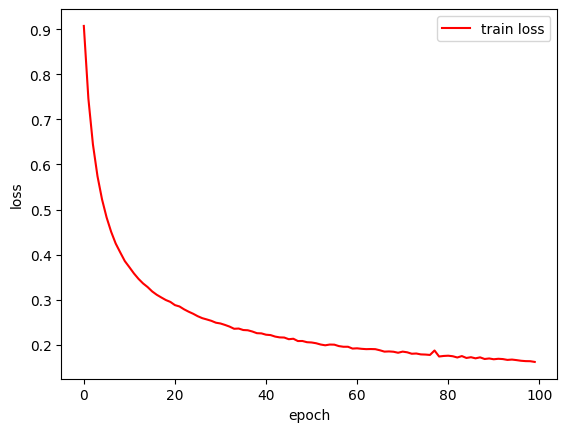

In [20]:

plt.plot(train_loss_list, label='train loss',color='red')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

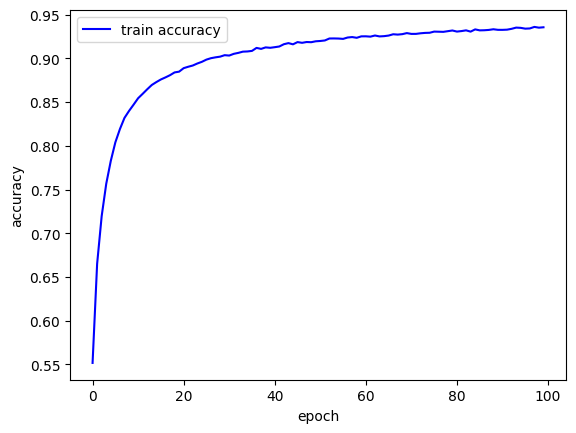

In [21]:
plt.plot(train_acc_list, label='train accuracy',color='blue')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

## Confusion matrix

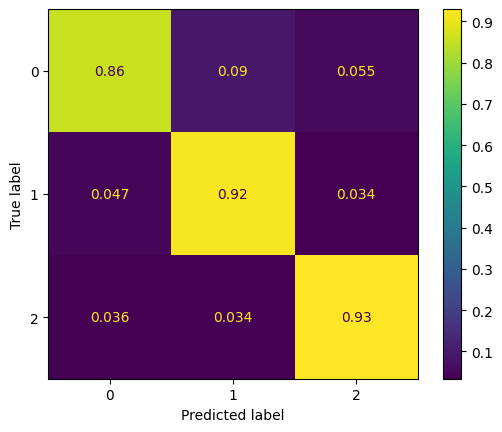

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, listarray)
cm = confusion_matrix(y_test, listarray, labels=[0,1,2],normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
disp.plot()
plt.show()

In [23]:
from sklearn.metrics import f1_score ## F1 Score 구하기
f1 = f1_score(y_test,listarray,pos_label='positive', average='micro')

C:\Users\jmjun\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [24]:
listarray

[0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


### Auc

In [25]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [26]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# make sample data
n_classes = 3
# X, y = make_classification(n_samples=200, n_features=5,
#                            n_informative=3, n_redundant=2
#                            , n_clusters_per_class=2
#                            , n_classes=n_classes
#                            , weights=[0.3, 0.2, 0.5]
#                            , random_state=99)

# y = label_binarize(y, classes=[0,1,2])

# # split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# # classifier
# clf = OneVsRestClassifier(GaussianNB())
# clf.fit(X_train, y_train)
# y_score = clf.predict_proba(X_test)
#   # 나이브베이즈 모델은 predict_proba 메서드로 각 클래스별 probability를 구할 수 있습니다.

# ROC & AUC
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], listarray[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# plt.figure(figsize=(15, 5))
# for idx, i in enumerate(range(n_classes)):
#     plt.subplot(131+idx)
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Class %0.0f' % idx)
#     plt.legend(loc="lower right")
# plt.show()

print("roc_auc_score: ", multiclass_roc_auc_score(y_test, listarray))

roc_auc_score:  0.9260346575641735
